In [3]:
import numpy as np
from matplotlib import pyplot as plt


# 3-1

In [4]:
def computecorrcoefNcosine(x, y):
    num = np.dot(x,y)
    cos = num / (np.linalg.norm(x) * np.linalg.norm(y))
    
    xm = x - np.mean(x)
    ym = y - np.mean(y)
    cor = np.dot(xm, ym) / (np.linalg.norm(xm) * np.linalg.norm(ym))
    
    return cor, cos

a = np.random.randn(15)
b = np.random.randn(15)

cor, cos = computecorrcoefNcosine(a, b)

print(cor, np.corrcoef(a, b))


0.03206532582540783 [[1.         0.03206533]
 [0.03206533 1.        ]]


# 3 - 2

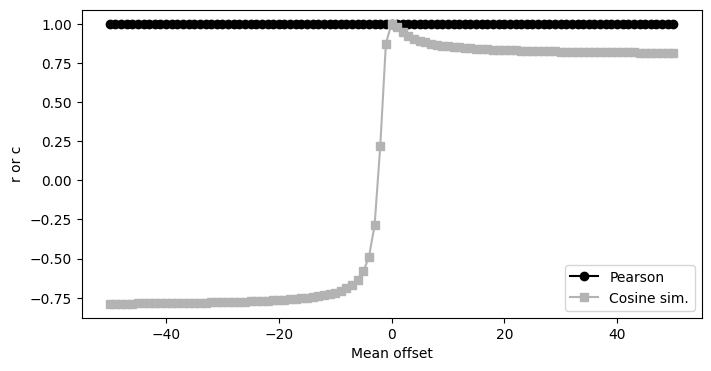

In [5]:
a = np.arange(4, dtype=float)
offsets = np.arange(-50,51)


result = np.zeros((len(offsets), 2))

for i in range(len(offsets)):
    result[i,:] = computecorrcoefNcosine(a, a + offsets[i])
    # (a, a+ -50), (a, a + -49),(a, a + -48),(a, a + -47),(a, a + -46),
plt.figure(figsize=(8,4))
h = plt.plot(offsets,result)
h[0].set_color('k')
h[0].set_marker('o')
h[1].set_color([.7, .7, .7])
h[1].set_marker('s')

plt.xlabel('Mean offset')
plt.ylabel('r or c')
plt.legend(['Pearson','Cosine sim.'])
# plt.savefig('Figure_03_02.png',dpi=300) # write out the fig to a file
plt.show()

# 3-3


In [2]:
from scipy.stats import pearsonr

pearsonr

<function scipy.stats._stats_py.pearsonr(x, y, *, alternative='two-sided', method=None)>

# 3-4



In [10]:
import time

def myCorrcoef(x, y):
    difx = x - np.mean(x)
    dify = y - np.mean(y)
    correff = np.dot(difx, dify) / (np.linalg.norm(difx) * np.linalg.norm(difx))
    
    return correff

start = time.time()

for i in range(1000):
    x = np.random.randn(500,2)
    myCorrcoef(x[:, 0], x[:, 1])
    

end = time.time()

ret1 = end - start

start = time.time()

for i in range(1000):
    x = np.random.randn(500,2)
    np.corrcoef(x[:, 0], x[:, 1])

end = time.time()

ret2 = end - start
print(ret1, ret2)

0.08597016334533691 0.1279430389404297


# 3-5


In [11]:
kernel = np.array([-1, 1])
signal = np.zeros(30)
signal[10:20] = 1

# _, axes = plt.subplots(1,2,figsize = (12, 4))
# axes[0].plot(kernel, 'ks-')
# axes[0].set_title('Kernel')
# axes[0].set_xlim([-15,15])

# axes[1].plot(signal, 'ks-')
# axes[1].set_title('sinal')


plt.show()

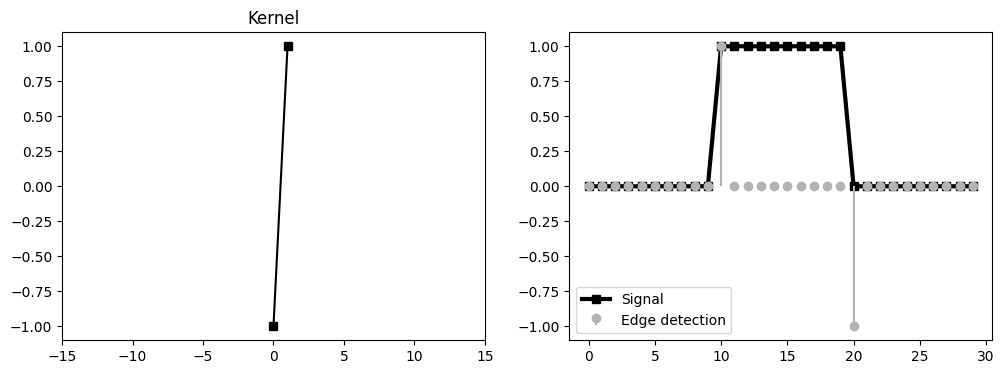

In [12]:
ret = np.zeros(30)
for i in range(1, len(signal) - 1): # 중요
    ret[i] = np.dot(signal[i - 1: i + 1], kernel)   # 합성곱 ==> 000000
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-15,15])
axs[1].plot(signal,'ks-',label='Signal',linewidth=3)
markers,stemlines,_ = axs[1].stem(range(len(ret)),ret,
                                  basefmt=' ',linefmt='',markerfmt='o',
                                  label='Edge detection') # ret 을 stem 스타일로 표시

plt.setp(stemlines,'color',[.7,.7,.7])
plt.setp(markers,'color',[.7,.7,.7])

axs[1].legend()
plt.show()

# 3-6

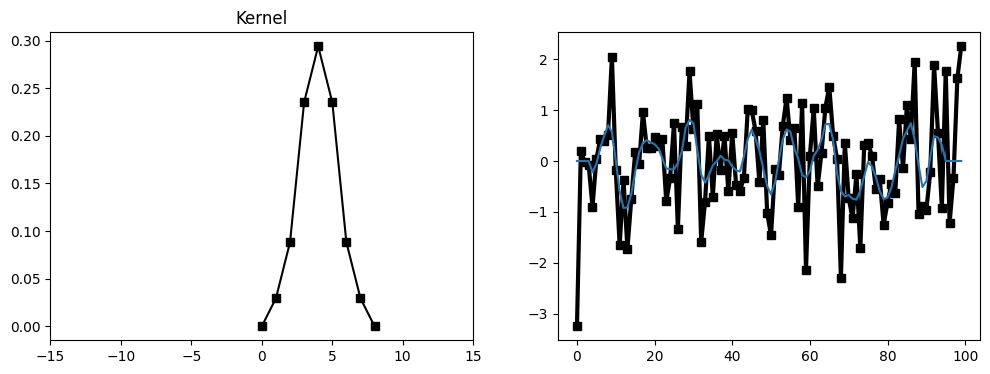

In [13]:
kernel = np.array([0,.1,.3,.8,1,.8,.3,.1,0])
kernel = kernel / np.sum(kernel)
signal = np.random.randn(100) #가우시안 난수
ret = np.zeros(100)
for i in range(4, len(signal) - 5): # 중요
    ret[i] = np.dot(signal[i - 4: i + 5], kernel) 
      
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-15,15])
axs[1].plot(signal,'ks-',label='Signal',linewidth=3)
axs[1].plot(ret, )


plt.show()

# 3-7


In [ ]:
kernel = np.array([0,.1,.3,.8,-1,.8,.3,.1,0])
kernel = kernel / np.sum(kernel)
signal = np.random.randn(100) #가우시안 난수
ret = np.zeros(100)
for i in range(4, len(signal) - 5): # 중요
    ret[i] = np.dot(signal[i - 4: i + 5], kernel) 
      
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-15,15])
axs[1].plot(signal,'ks-',label='Signal',linewidth=3)
axs[1].plot(ret, )

# 3-8


In [ ]:
nPerClust = 50

# blur around centroid (std units)
blur = 1

# XY centroid locations
A = [  1, 1 ]
B = [ -3, 1 ]
C = [  3, 3 ]

# generate data
# 각 점 ABC로 부터 랜덤하게 떨어져있는 abc 점 50개씩 생성
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# concatanate into a matrix
data = np.transpose( np.concatenate((a,b,c),axis=1) )


# plot data
plt.plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
plt.title('Raw (preclustered) data')
plt.xticks([])
plt.yticks([])

plt.show()

In [ ]:
## initialize random cluster centroids
k = 3 # extract three clusters

# random cluster centers (randomly sampled data points)
# 데이터 중에 하나 뽑아서 센터 중심점으로 초기화
ridx = np.random.choice(range(len(data)),k,replace=False)
centroids = data[ridx,:]


# setup the figure
fig,axs = plt.subplots(2,2,figsize=(6,6))
axs = axs.flatten()
lineColors = [ [0,0,0],[.4,.4,.4],[.8,.8,.8] ]#'rbm'


# plot data with initial random cluster centroids
axs[0].plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
axs[0].plot(centroids[:,0],centroids[:,1],'ko')
axs[0].set_title('Iteration 0')
axs[0].set_xticks([])
axs[0].set_yticks([])



# loop over iterations
for iteri in range(3):
    
  # step 1: compute distances
  # 거리 배열 초기화 (data 개수, 집단 개수)
  dists = np.zeros((data.shape[0],k))
  for ci in range(k):
    # 데이터랑 집군 중심점이랑 x, y 의 차이의 제곱합
    dists[:,ci] = np.sum((data-centroids[ci,:])**2,axis=1)
        
  # step 2: assign to group based on minimum distance
  #가장 가까운 데이터 인덱스
  groupidx = np.argmin(dists,axis=1)
    
  # step 3: recompute centers
  for ki in range(k):
    # groupidx와 같은 인덱스의 데이터의 x, y 점의 평균을 다시 중심점으로 초기화 
    centroids[ki,:] = [ np.mean(data[groupidx==ki,0]), np.mean(data[groupidx==ki,1]) ]
  

  # plot data points
  for i in range(len(data)):
    axs[iteri+1].plot([ data[i,0],centroids[groupidx[i],0] ],[ data[i,1],centroids[groupidx[i],1] ],color=lineColors[groupidx[i]])
  axs[iteri+1].plot(centroids[:,0],centroids[:,1],'ko')
  axs[iteri+1].set_title(f'Iteration {iteri+1}')
  axs[iteri+1].set_xticks([])
  axs[iteri+1].set_yticks([])


# plt.savefig('Figure_03_03.png',dpi=300)
plt.show()